<a href="https://colab.research.google.com/github/mark3000-010701/Dataanalyst/blob/main/DA_supermarket_sales_Sheet1_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df.shape

(1000, 17)

In [6]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

# 1. Thống kê tổng giá trị bán ra (Tính sum Cột Total) theo dòng sản phẩm (Product line) và theo từng ngày trong năm
# 2. Thông kê lượng tiền qua các hình thức thanh toán

In [5]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

# xử lí ngoại lai

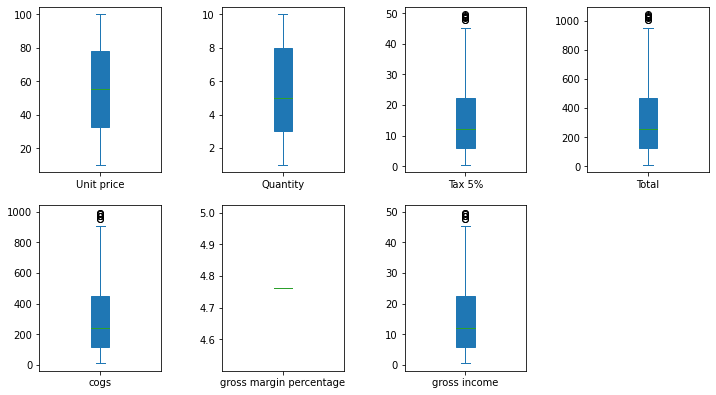

In [6]:

df_to_plot = df.drop(columns = ['Customer type','Gender','Product line','Date','Time','Rating'])
df_to_plot.plot(subplots =True, kind = 'box', layout = (4,4), figsize = (12,14),patch_artist=True)
plt.subplots_adjust(wspace = 0.5)

In [7]:
df['gross margin percentage'].value_counts()

4.761905    1000
Name: gross margin percentage, dtype: int64

In [8]:
df.drop(columns = ['gross margin percentage','gross income'], inplace = True)

In [9]:
def outlier_detector(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    df_final = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR)))]
    return df_final

In [10]:
df['Tax 5%'] = outlier_detector(df['Tax 5%'])
df['Total']  = outlier_detector(df['Total']) 
df['cogs']   = outlier_detector(df['cogs'])
df.dropna(axis = 'index', how = 'any', inplace = True)

In [11]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,5.3


# 1. Thống kê tổng giá trị bán ra (Tính sum Cột Total) theo dòng sản phẩm (Product line) và theo từng ngày trong năm

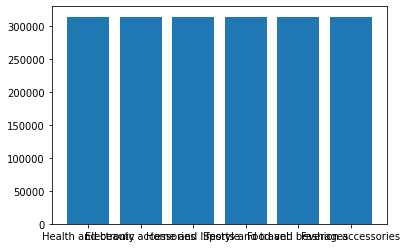

In [12]:
fig = plt.bar(df['Product line'],df['Total'].sum(),width=0.8)
plt.show()

In [13]:
def barValue_horizontal(ax):
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 2
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(1, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values

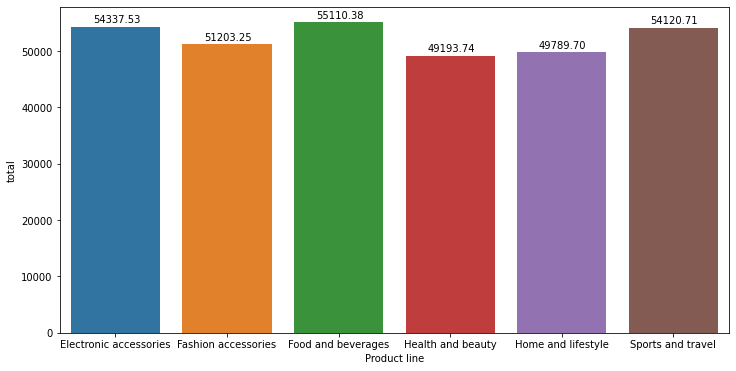

<Figure size 720x360 with 0 Axes>

In [14]:
plt.figure(figsize=(12,6))
df_1=df.groupby(['Product line'])['Total'].sum().reset_index(name='total')
fig = sns.barplot(data=df_1,x='Product line',y='total')
#barPerc_without_hue
barValue_horizontal(fig)
plt.figure(figsize=(10,5))
plt.show()

In [15]:
df['Date']

0       1/5/2019
1       3/8/2019
2       3/3/2019
3      1/27/2019
4       2/8/2019
         ...    
994    2/18/2019
995    1/29/2019
997     2/9/2019
998    2/22/2019
999    2/18/2019
Name: Date, Length: 991, dtype: object

In [16]:
def barPerc_without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

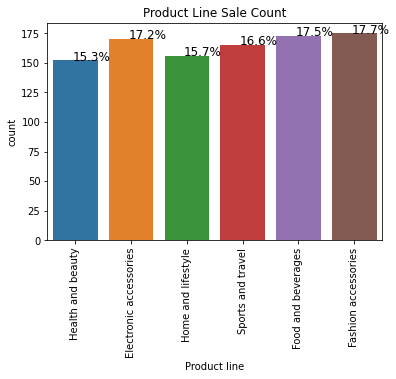

In [17]:
ax = sns.countplot()
ax = sns.countplot(data=df, x='Product line')
barPerc_without_hue(ax, df['Product line'])
plt.xticks(rotation=90)
plt.title('Product Line Sale Count')
plt.show()

In [ ]:
df_group_productLine = df.groupby(['Branch','Product line'])['Total'].sum()
fig = px.line(df_group_productLine,x='Product line',y='total',color='Branch')
fig.show()

In [18]:
import plotly.express as px

In [23]:

df_groupTotal = df.groupby(['Branch','Date'])['Total'].sum().reset_index(name='total')
fig = px.line(df_groupTotal, x='Date',y='total',color='Branch')
fig.show()

In [24]:
df_groupTotal = df.groupby(['Product line','Date'])['Total'].sum().reset_index(name='total')
fig = px.line(df_groupTotal, x='Date',y='total',color='Product line')
fig.show()

# Thông kê lượng tiền qua các hình thức thanh toán

In [38]:
df.groupby(['Payment']).agg({"Total": [np.mean, np.sum, np.min, np.max], "Quantity": [np.mean, np.sum], "Unit price": [np.mean, np.sum, np.min, np.max]})

Total                       ... Unit price              
                   mean         sum     amin  ...        sum   amin   amax
Payment                                       ...                         
Cash         322.224737  110200.860  10.6785  ...   19334.07  10.08  99.96
Credit card  314.794925   96642.042  12.6945  ...   16523.82  10.18  99.96
Ewallet      312.609377  106912.407  13.4190  ...   18936.96  10.13  99.92

[3 rows x 10 columns]

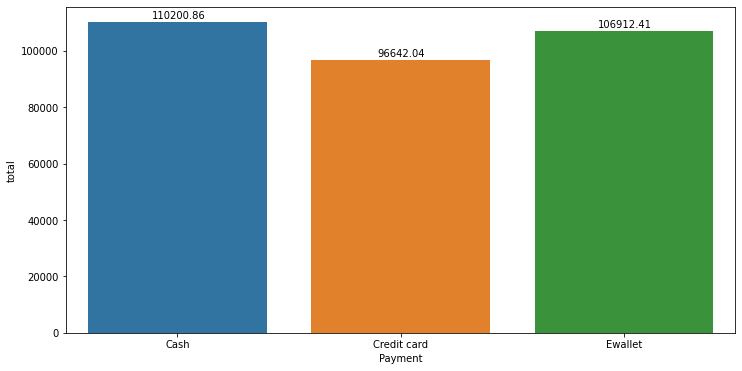

In [47]:
plt.figure(figsize=(12,6))
df_2=df.groupby(['Payment'])['Total'].sum().reset_index(name='total')
fig = sns.barplot(data=df_2,x='Payment',y='total')
#barPerc_without_hue
barValue_horizontal(fig)

plt.show()